**Attempt to run the same benchmark I used on my PC on my Mac**

In [48]:
import torch

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device = mps_device)
    print(x)
else:
    print("MPS device not found")

tensor([1.], device='mps:0')


In [49]:
# installing/upgrading fastai2 
!pip install --upgrade fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 317.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.4/488.4 kB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.1/781.1 kB 5.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.0 MB/s e

In [50]:
%matplotlib inline
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

torch.backends.cudnn.benchmark = True

In [51]:
# Test to ensure that my cuda is still visible
import torch as torch
torch.cuda.is_available()

False

In [52]:
torch.device("cpu")
default_device(-1)
defaults.device = 'cpu'
# torch.cuda.device(0) to select the first GPU (and only GPU on my system)
#torch.cuda.current_device()

In [53]:
cpu = torch.device("cpu")


In [54]:
path = untar_data(URLs.CIFAR)
path

Path('/Users/rff/.fastai/data/cifar10')

In [55]:
bs = 256


In [56]:
ds_tfms = ([OldRandomCrop(4, 32), FlipItem(p=0.5)], [])
data = ImageDataLoaders.from_folder(path, valid='test', item_tfms=ds_tfms, bs=bs)


In [57]:
learn = Learner(data, xresnet152(pretrained=True).to("cpu"), metrics=accuracy)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /Users/rff/.cache/torch/hub/checkpoints/xrn50_940.pth
100.0%


SuggestedLRs(valley=0.0006918309954926372)

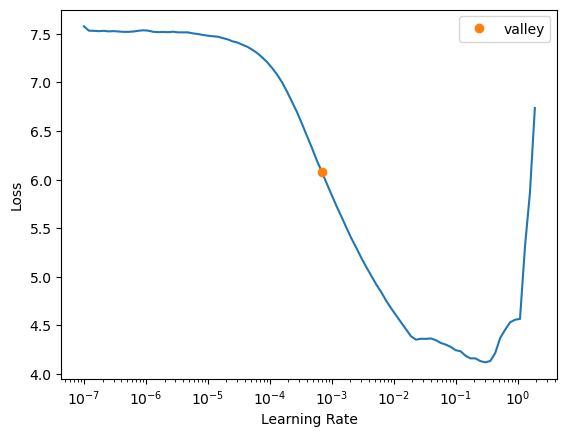

In [58]:
learn.lr_find()

In [59]:
%%timeit  -n 1 -r 1

learn.fit_one_cycle(15, 0.000575439, wd=0.4, div=10, pct_start=0.5)

epoch,train_loss,valid_loss,accuracy,time
0,1.331175,1.138480,0.604500,02:00
1,0.890139,0.908085,0.684900,01:54
2,0.680683,0.803271,0.720300,01:53
3,0.512340,0.814464,0.729700,01:52
4,0.383890,0.917881,0.724000,01:52
5,0.312591,1.152800,0.698400,01:53
6,0.275450,1.051728,0.711600,01:53
7,0.219055,1.139824,0.713900,01:54
8,0.169927,1.119776,0.719600,01:54


KeyboardInterrupt: 